In [71]:
import pandas as pd


path ="Exam_Score_Prediction.csv"

exam_data = pd.read_csv(path)
print(exam_data.columns)
print(exam_data.head(5))
print("isnull")
print(exam_data.isnull().sum())


Index(['student_id', 'age', 'gender', 'course', 'study_hours',
       'class_attendance', 'internet_access', 'sleep_hours', 'sleep_quality',
       'study_method', 'facility_rating', 'exam_difficulty', 'exam_score'],
      dtype='object')
   student_id  age  gender   course  study_hours  class_attendance  \
0           1   17    male  diploma         2.78              92.9   
1           2   23   other      bca         3.37              64.8   
2           3   22    male     b.sc         7.88              76.8   
3           4   20   other  diploma         0.67              48.4   
4           5   20  female  diploma         0.89              71.6   

  internet_access  sleep_hours sleep_quality   study_method facility_rating  \
0             yes          7.4          poor       coaching             low   
1             yes          4.6       average  online videos          medium   
2             yes          8.5          poor       coaching            high   
3             yes       

In [72]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

gender = LabelEncoder()
exam_data["gender"] = gender.fit_transform(exam_data["gender"])
course = LabelEncoder()
exam_data["course"] = course.fit_transform(exam_data["course"])
internet = LabelEncoder()
exam_data["internet_access"] = internet.fit_transform(exam_data["internet_access"])
sleep = LabelEncoder()
exam_data["sleep_quality"] = sleep.fit_transform(exam_data["sleep_quality"])
study = LabelEncoder()
exam_data["study_method"] = study.fit_transform(exam_data["study_method"])
facility_rating = LabelEncoder()
exam_data["facility_rating"] = facility_rating.fit_transform(exam_data["facility_rating"])
exam_difficulty = LabelEncoder()
exam_data["exam_difficulty"] = exam_difficulty.fit_transform(exam_data["exam_difficulty"])

exam_data["attendance_ratio"] = exam_data["class_attendance"] / 100
exam_data["study_effort"] = exam_data["study_hours"] * exam_data["attendance_ratio"]
exam_data["study_hours_log"] = np.log(exam_data["study_hours"] + 1)



In [73]:
corr = exam_data.corr()["exam_score"].sort_values(ascending=True)
print(corr)
print("\n")
corre = exam_data.corr()["sleep_quality"].sort_values(ascending=True)
print(corre)

study_method       -0.154610
sleep_quality      -0.099725
facility_rating    -0.071879
internet_access    -0.007826
course             -0.000448
gender             -0.000428
student_id          0.003269
exam_difficulty     0.003432
age                 0.006522
sleep_hours         0.133222
attendance_ratio    0.308850
class_attendance    0.308850
study_hours_log     0.692748
study_hours         0.717788
study_effort        0.762154
exam_score          1.000000
Name: exam_score, dtype: float64


exam_score         -0.099725
sleep_hours        -0.010000
student_id         -0.007283
internet_access    -0.004282
exam_difficulty    -0.004169
facility_rating    -0.003511
age                -0.002935
gender              0.000454
class_attendance    0.003473
attendance_ratio    0.003473
study_hours         0.005389
course              0.005533
study_hours_log     0.006850
study_effort        0.007225
study_method        0.008127
sleep_quality       1.000000
Name: sleep_quality, dtype: float64


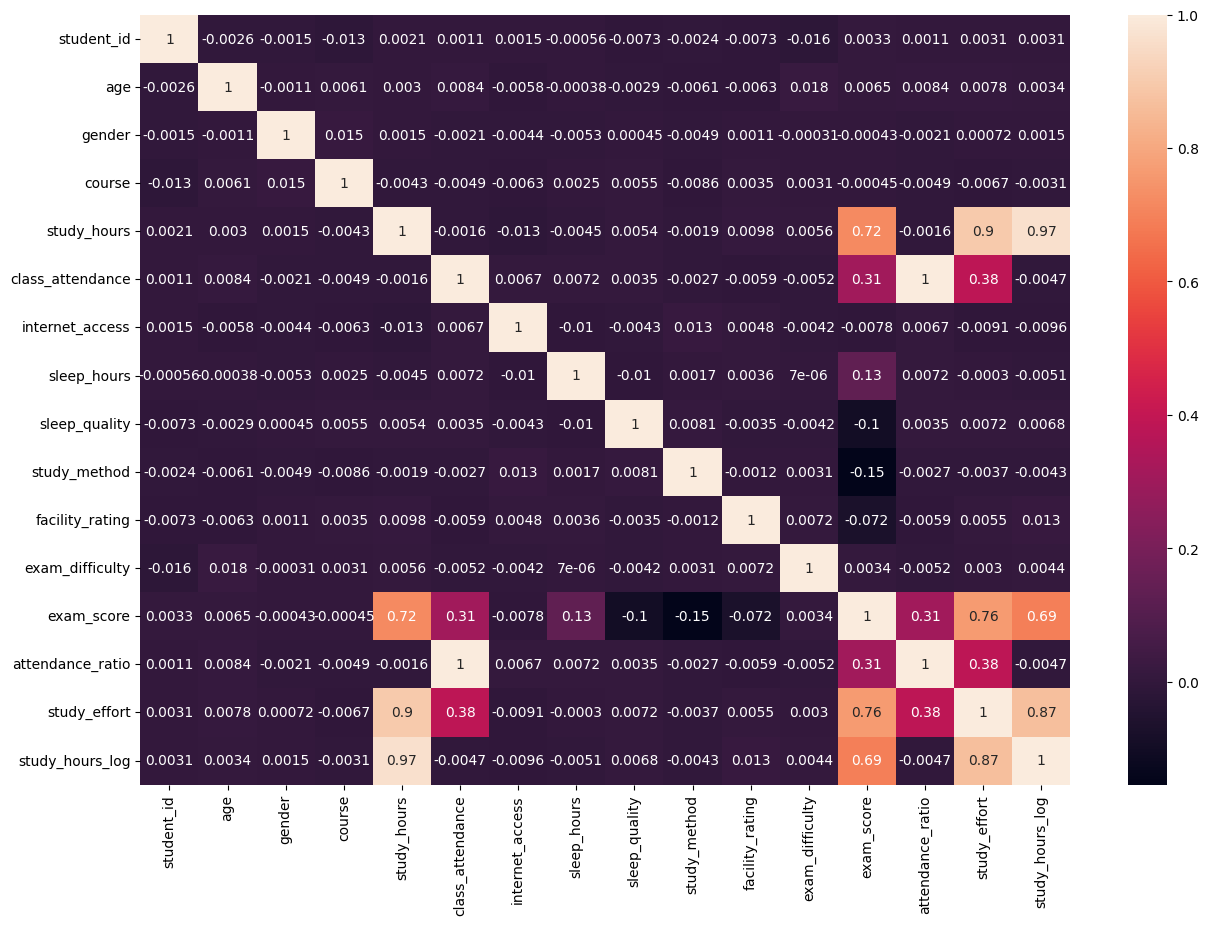

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
sns.heatmap(data=exam_data.corr(),annot=True)
plt.show()

<Figure size 1500x1000 with 0 Axes>

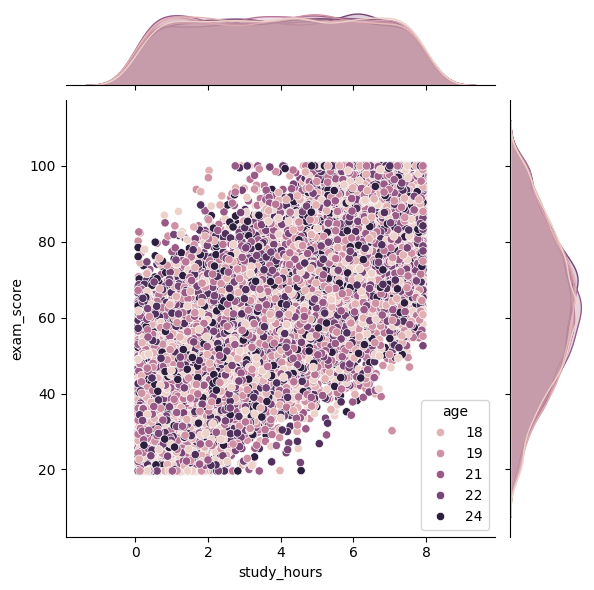

In [75]:
plt.figure(figsize=(15,10))

sns.jointplot(data=exam_data,x="study_hours",y="exam_score",hue="age")
plt.show()

<Figure size 1500x1000 with 0 Axes>

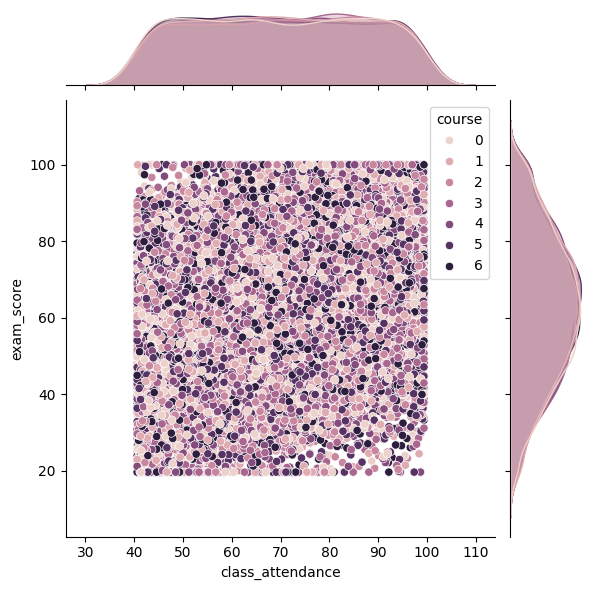

In [76]:
plt.figure(figsize=(15,10))

sns.jointplot(data=exam_data,x="class_attendance",y="exam_score",hue="course")
plt.show()

<Figure size 1500x1000 with 0 Axes>

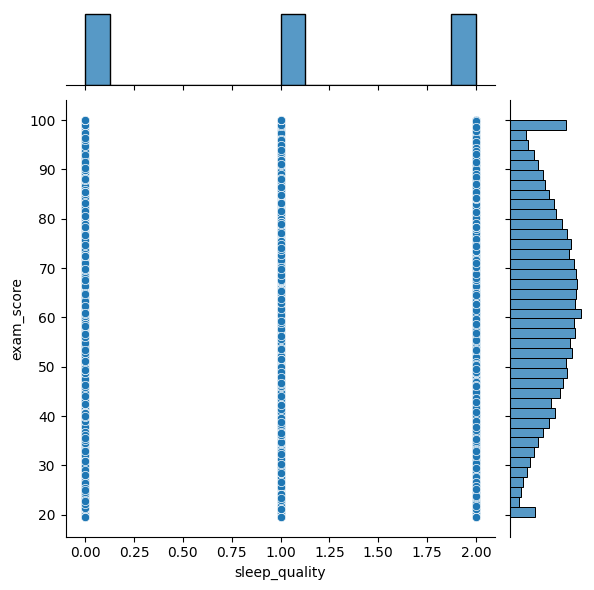

In [77]:
plt.figure(figsize=(15,10))

sns.jointplot(data=exam_data,x="sleep_quality",y="exam_score")
plt.show()

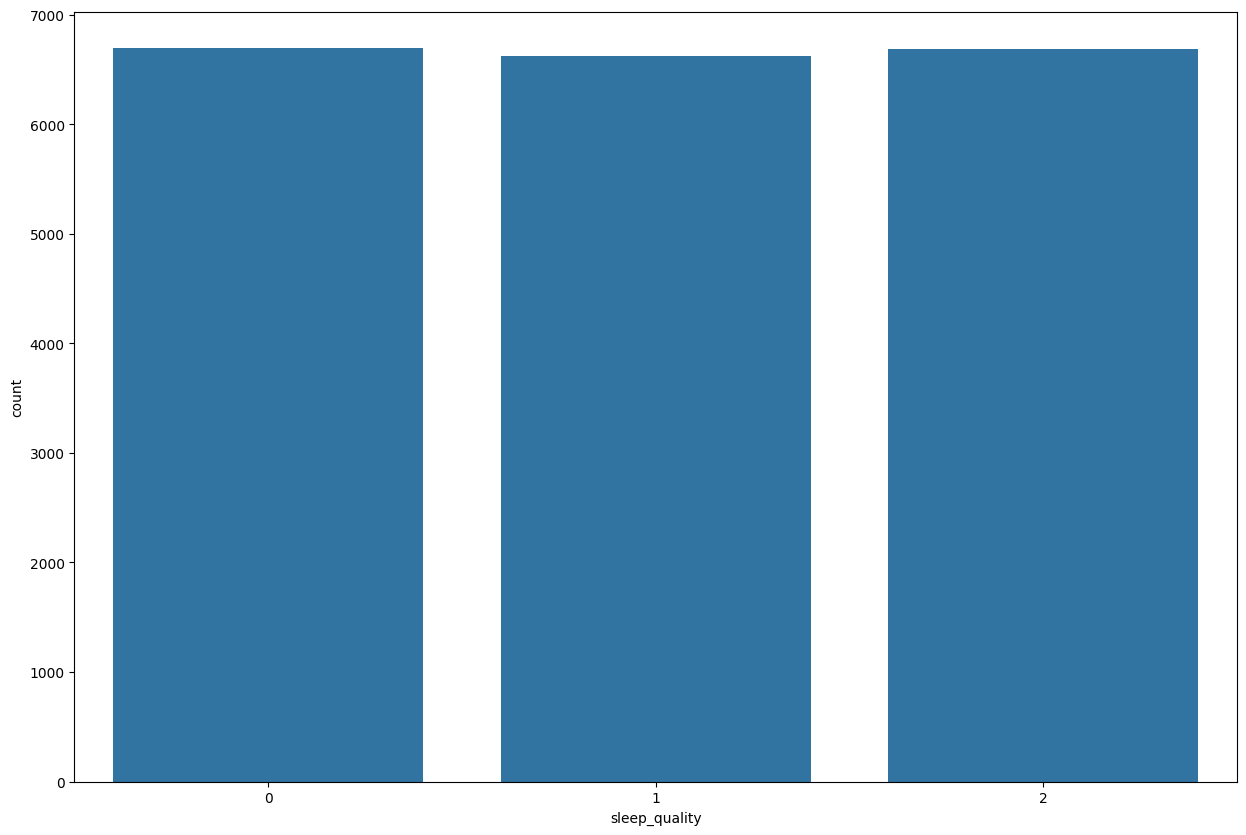

In [78]:
plt.figure(figsize=(15,10))

sns.countplot(data=exam_data,x="sleep_quality")
plt.show()

In [90]:
from sklearn.linear_model import LinearRegression
from sklearn. metrics import accuracy_score, r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



print(exam_data.columns)

# X = exam_data.drop(columns =["exam_score","study_method","sleep_quality","course","facility_rating","internet_access","gender","student_id"])
X = exam_data.drop(columns=["exam_score","student_id","course","age"])

sc = StandardScaler()

X_scaled = sc.fit_transform(X)
y = exam_data["exam_score"]  
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.15, random_state=42)


Index(['student_id', 'age', 'gender', 'course', 'study_hours',
       'class_attendance', 'internet_access', 'sleep_hours', 'sleep_quality',
       'study_method', 'facility_rating', 'exam_difficulty', 'exam_score',
       'attendance_ratio', 'study_effort', 'study_hours_log'],
      dtype='object')


In [91]:

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Train R2:",round(model.score(X_train, y_train)*100,2))
print("Test R2:", round(r2_score(y_test, y_pred)*100,2))
print("R2 Score:", round(r2_score(y_test, y_pred)*100,2))
print("MAE:", round(mean_absolute_error(y_test, y_pred),2))
mse =round(mean_squared_error(y_test, y_pred),2)
print("MSE:",mse )
rmse = mse**0.5
print(f"RMSE  ={round(rmse,2)}")


Train R2: 67.03
Test R2: 66.27
R2 Score: 66.27
MAE: 8.86
MSE: 119.97
RMSE  =10.95
